# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Preview the dataset
data.head()

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6


Plot this time series data. 

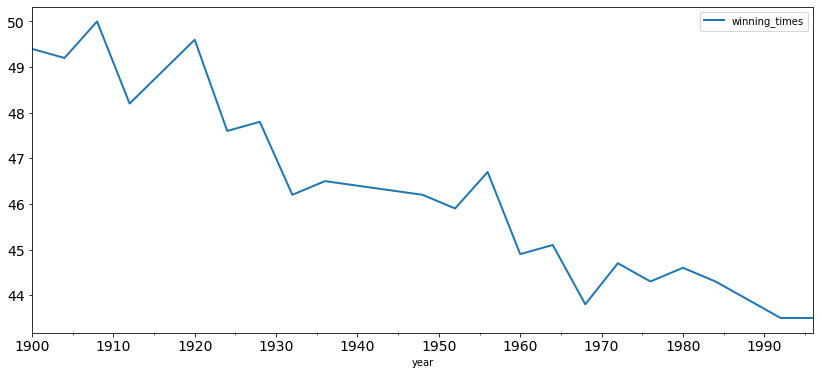

In [3]:
# Plot the time series
data.plot(figsize=(14,6), linewidth=2, fontsize=14);

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [4]:
# Difference the time series
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

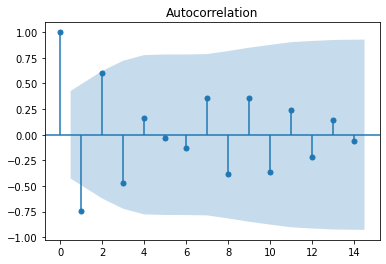

In [5]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_diff);

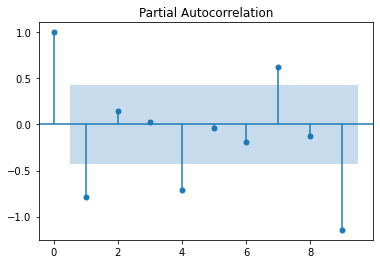

In [6]:
# Plot the PACF
plot_pacf(data_diff, lags=9);

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [7]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(data_diff, order=(1, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Mon, 22 Aug 2022   AIC                             46.107
Time:                        16:01:01   BIC                             49.241
Sample:                    12-31-1904   HQIC                            46.787
                         - 12-31-1996                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.000      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3916           +0.0000j            1.3916            0.5000
-----------------------------------------------------------------------------
"""

In [8]:
model2 = ARMA(data_diff, order=(1, 1)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 1)   Log Likelihood                 -19.958
Method:                       css-mle   S.D. of innovations              0.615
Date:                Mon, 22 Aug 2022   AIC                             47.916
Time:                        16:01:17   BIC                             52.094
Sample:                    12-31-1904   HQIC                            48.822
                         - 12-31-1996                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2850      0.086     -3.298      0.001      -0.454      -0.116
ar.L1.winning_times    -0.7708      0.160     -4.826      0.000      -1.084      -0.458
ma.L1.winning_times     0.1172      0.254      0.462      0.644      -0.380       0.614
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2974           +0.0000j            1.2974            0.5000
MA.1           -8.5305           +0.0000j            8.5305            0.5000
-----------------------------------------------------------------------------
"""

In [9]:
model3 = ARMA(data_diff, order=(3, 4)).fit()
model3.summary()

C:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(3, 4)   Log Likelihood                 -15.190
Method:                       css-mle   S.D. of innovations              0.414
Date:                Mon, 22 Aug 2022   AIC                             48.381
Time:                        16:01:42   BIC                             57.782
Sample:                    12-31-1904   HQIC                            50.421
                         - 12-31-1996                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2941      0.034     -8.689      0.000      -0.360      -0.228
ar.L1.winning_times    -1.1720      0.301     -3.896      0.000      -1.762      -0.582
ar.L2.winning_times     0.1173      0.496      0.237      0.813      -0.854       1.089
ar.L3.winning_times     0.5365      0.272      1.976      0.048       0.004       1.069
ma.L1.winning_times     0.7616      0.429      1.775      0.076      -0.079       1.602
ma.L2.winning_times    -0.4260      0.374     -1.138      0.255      -1.159       0.307
ma.L3.winning_times    -1.1183      0.386     -2.895      0.004      -1.875      -0.361
ma.L4.winning_times    -0.2173      0.375     -0.580      0.562      -0.952       0.517
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9616           -0.4110j            1.0457           -0.4357
AR.2           -0.9616           +0.4110j            1.0457            0.4357
AR.3            1.7044           -0.0000j            1.7044           -0.0000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.7721           -0.6355j            1.0000           -0.3904
MA.3           -0.7721           +0.6355j            1.0000            0.3904
MA.4           -4.6017           -0.0000j            4.6017           -0.5000
-----------------------------------------------------------------------------
"""

## What is your final model? Why did you pick this model?

In [10]:
# Your comments here
#I'm picking ARMA(1,0) because it has the lower BIC and AIC scores overall. 

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 